<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/KNN_(BreastCancer_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# breast cacer 데이터 불러오기
cancer = load_breast_cancer()

In [ ]:
# 어떤 정보가 있는지 확인해보기
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
cancer['filename']

'breast_cancer.csv'

In [ ]:
# feature 정보 확인하기
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# feature 개수 확인하기
len(cancer['feature_names'])

30

In [ ]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
len(cancer['target_names'])

2

In [ ]:
# 569 x 30의 배열을 가진 것을 확인
cancer['data'].shape

(569, 30)

In [ ]:
# 보기 복잡하여 데이터 프레임으로 만들어서 확인해보기
import pandas as pd

cancer = load_breast_cancer()
df =  pd.DataFrame(cancer.data, columns=[cancer.feature_names])

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Train 데이터 세트와 Test 데이터 세트를 구성한다
trainX, testX, trainY, testY = \
    train_test_split(cancer['data'], cancer['target'], test_size = 0.2)

In [ ]:
# KNN 으로 Train 데이터 세트를 학습한다.
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [ ]:
# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = knn.score(testX, testY)와 동일함.
predY = knn.predict(testX)
accuracy = (testY == predY).mean()
print("* 시험용 데이터로 측정한 정확도 = %.2f" % accuracy)
print()


# Train 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
predY = knn.predict(trainX)
accuracy = (trainY == predY).mean()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % accuracy)

* 시험용 데이터로 측정한 정확도 = 0.94

* 학습용 데이터로 측정한 정확도 = 0.95


In [ ]:
# k를 변화시켜가면서 정확도를 측정해 본다
testAcc = []
trainAcc = []
for k in range(1, 50):
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(trainX, trainY)
    
    # Test 세트의 Feature에 대한 정확도
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))
    
    # Train 세트의 Feature에 대한 정확도
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))
print(testAcc)
print()
print(trainAcc)

[0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088]

[1.0, 0.9692307692

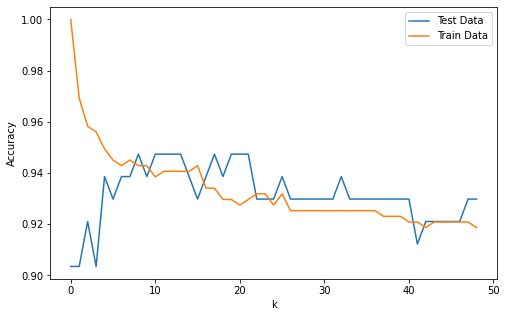

In [ ]:
# 그래프로 확인해본다. 
plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


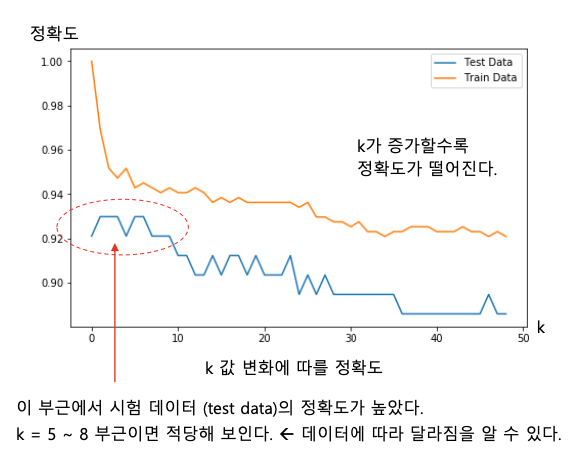

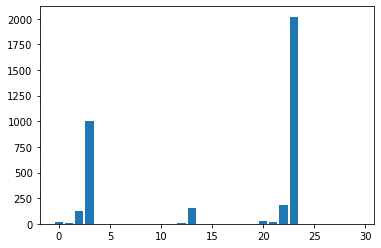

In [ ]:
# 학습 데이터 1개의 column(feature)별 분포를 확인한다.
plt.bar(np.arange(30), cancer['data'][0])
plt.show()